In [1]:
# Version-1

import numpy as np # linear algebra
import pandas as pd
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sqlite3 import Error
from sklearn.ensemble import RandomForestClassifier
import sqlite3
import pickle
import nltk
#nltk.download('stopwords')
%matplotlib inline

In [2]:
dataset = pd.read_csv("condition_drugName_label_text_dataset.csv")


In [3]:
dataset.shape

(50709, 5)

In [13]:
dataset = dataset[["text","rating_label"]]

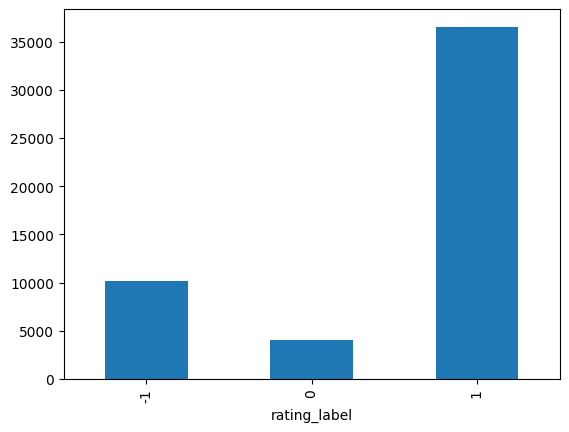

In [14]:
dataset.groupby('rating_label').text.count().plot.bar(ylim=0)
plt.show()

In [15]:
#nltk.download('stopwords')
stemmer = PorterStemmer()
words = stopwords.words("english")
dataset['cleaned'] = dataset['text'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())

In [16]:
dataset.head(10)

,text,rating_label,cleaned
0,"After 20 years of seeing psychiatrists, I was ...",1,after year see psychiatrist i final correctli ...
1,I've been diagnosed with ADD at the age of 42 ...,1,i diagnos add age struggl major depress sinc a...
2,My son (9yrs old) has been taking this for abo...,1,my son yr old take week add i apprehens resort...
3,My son takes this. Best medication he has been...,1,my son take best medic work just hard get alwa...
4,My adult ADHD is the result of a traumatic bra...,1,my adult adhd result traumat brain injuri thi ...
5,My doctor recently switched me from Ritalin LA...,-1,my doctor recent switch ritalin la methylin er...
6,"It gave me back a life, which I thought I woul...",1,it gave back life i thought i would never
7,I was prescribed this for ADHD that was along ...,1,i prescrib adhd along bipolar disord i didnt t...
8,I have been on Methylin ER for about a year an...,1,i methylin er year half i still lot difficulti...
9,I've been on antidepressants from the old styl...,1,i antidepress old style newer ssri snri other ...


In [17]:
vectorizer = TfidfVectorizer(min_df= 3, stop_words="english", sublinear_tf=True, norm='l2', ngram_range=(1, 3))
final_features = vectorizer.fit_transform(dataset['cleaned']).toarray()
final_features.shape
print("Features are done")
from sklearn.linear_model import LogisticRegression
X = dataset['cleaned']
Y = dataset['rating_label']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

pipeline = Pipeline([('vect', vectorizer),
                     ('chi',  SelectKBest(chi2, k=1200)),
                     ('clf', LogisticRegression(random_state=0))])

model = pipeline.fit(X_train, y_train)
with open('LogisticRegression.pickle', 'wb') as f:
    pickle.dump(model, f)

ytest = np.array(y_test)

# confusion matrix and classification report(precision, recall, F1-score)
print(classification_report(ytest, model.predict(X_test)))
print(confusion_matrix(ytest, model.predict(X_test)))

Features are done


/Users/aliakkaya/PycharmProjects/drugRepositioning/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

          -1       0.70      0.48      0.57      1964
           0       0.29      0.00      0.00       810
           1       0.81      0.96      0.88      7368

    accuracy                           0.79     10142
   macro avg       0.60      0.48      0.48     10142
weighted avg       0.75      0.79      0.75     10142

[[ 934    2 1028]
 [ 134    2  674]
 [ 259    3 7106]]
